#  Support Vector Machine (SVM)

## Imports

In [1]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt


# Support vector machine linear classifier
from sklearn.svm import SVC
import joblib

from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import classification_report

from sklearn.datasets import load_digits
from sklearn.svm import SVC
from sklearn.model_selection import validation_curve

//anaconda3/envs/PythonWebMongo/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
//anaconda3/envs/PythonWebMongo/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
//anaconda3/envs/PythonWebMongo/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
//anaconda3/envs/PythonWebMongo/lib/python3.6/site-pack

## Load Test and Train Data
NOTE: ETL and Splitting of Test and Train Data was performed in another Notebook

In [2]:
path = '../data/'
X_train = pd.read_csv(path + "X_train.csv")
X_test = pd.read_csv(path + "X_test.csv")
y_train = pd.read_csv(path + "y_train.csv")
y_test = pd.read_csv(path + "y_test.csv")

In [3]:
# Apply the MinMax Scaler
X_scaler = MinMaxScaler().fit(X_train)
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [4]:
# Label encode the dependent variable, then Hot encode it
label_encoder = LabelEncoder()
label_encoder.fit(y_train)
y_train_encoded = label_encoder.transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

//anaconda3/envs/PythonWebMongo/lib/python3.6/site-packages/sklearn/preprocessing/label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
//anaconda3/envs/PythonWebMongo/lib/python3.6/site-packages/sklearn/preprocessing/label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


# Define Function to Create Validation Curve

In [5]:
def validationCurve(param, range, X, y, label):

    train_scores, test_scores = validation_curve(
        SVC(), X, y, param_name=param, param_range=range,
        scoring="accuracy", n_jobs=5)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    plt.figure(figsize=(10,5))
    plt.title("Validation Curve with SVM")
    plt.xlabel(label)
    plt.ylabel("Score")
    plt.ylim(0.0, 1.1)
    lw = 2
    
    if (param=='gamma'):
        plt.semilogx(range, train_scores_mean, label="Training score",
                     color="darkorange", lw=lw)
        plt.fill_between(range, train_scores_mean - train_scores_std,
                         train_scores_mean + train_scores_std, alpha=0.2,
                         color="darkorange", lw=lw)
        plt.semilogx(range, test_scores_mean, label="Cross-validation score",
                     color="navy", lw=lw)
        plt.fill_between(range, test_scores_mean - test_scores_std,
                         test_scores_mean + test_scores_std, alpha=0.2,
                         color="navy", lw=lw)
    else:
        plt.scatter(range, train_scores_mean, label="Training score",
             color="darkorange", lw=lw)
        plt.fill_between(range, train_scores_mean - train_scores_std,
                         train_scores_mean + train_scores_std, alpha=0.2,
                         color="darkorange", lw=lw)
        plt.scatter(range, test_scores_mean, label="Cross-validation score",
                     color="navy", lw=lw)
        plt.fill_between(range, test_scores_mean - test_scores_std,
                         test_scores_mean + test_scores_std, alpha=0.2,
                         color="navy", lw=lw)
    plt.legend(loc="best")

    plt.show()
    return

# Plot the Validation Curves

//anaconda3/envs/PythonWebMongo/lib/python3.6/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


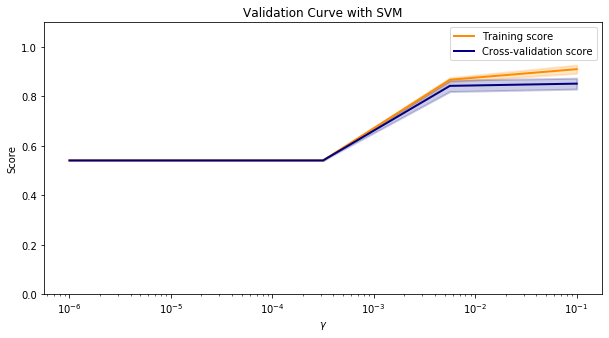

In [6]:
# def validationCurve(param, range, X, y, label)
validationCurve('gamma', np.logspace(-6, -1, 5), X_train_scaled, y_train_encoded, r"$\gamma$")

//anaconda3/envs/PythonWebMongo/lib/python3.6/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


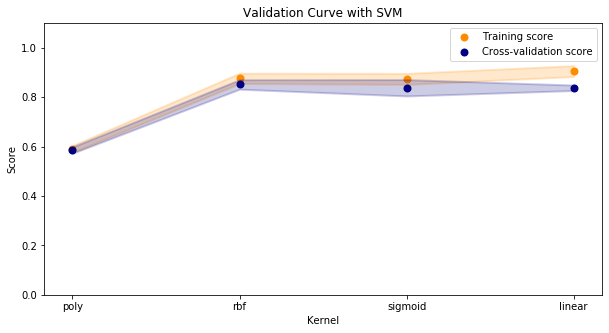

In [7]:
# def validationCurve(param, range, X, y, label)
validationCurve('kernel', ['poly','rbf', 'sigmoid', 'linear'], X_train_scaled, y_train_encoded, 'Kernel', )

//anaconda3/envs/PythonWebMongo/lib/python3.6/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


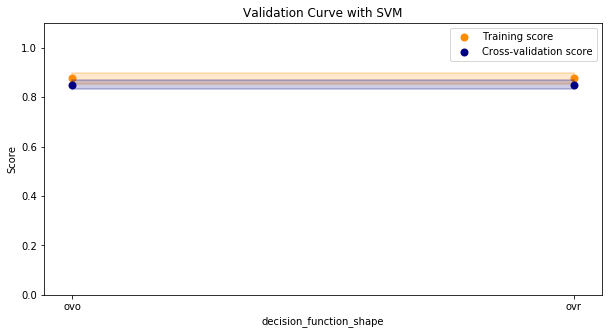

In [8]:
# def validationCurve(param, range, X, y, label)
validationCurve('decision_function_shape', ['ovo', 'ovr'], X_train_scaled, y_train_encoded, 'decision_function_shape')

# Create and Run SVC Model

In [9]:
# Kernel Options:  rbf, poly, linear, sigmoid, precomputed
# Select sigmoid per the validation models and default the other parameters
model = SVC(kernel='linear', gamma=0.1) 
model.fit(X_train_scaled, y_train_encoded)
predictions = model.predict(X_test_scaled)

In [10]:
# Calculate classification report
print(classification_report(y_test_encoded, predictions,
                            target_names=["buff", "sick"]))

              precision    recall  f1-score   support

        buff       0.81      0.88      0.84        40
        sick       0.84      0.76      0.80        34

    accuracy                           0.82        74
   macro avg       0.83      0.82      0.82        74
weighted avg       0.83      0.82      0.82        74



In [11]:
model.get_params(model)

{'C': 1.0,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 0.1,
 'kernel': 'linear',
 'max_iter': -1,
 'probability': False,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

# Display Predictions

In [12]:
results = pd.DataFrame(list(zip(y_test_encoded, predictions)), columns = ['Actual',
    'Prediction'])
results.head()

,Actual,Prediction
0,1,1
1,1,1
2,1,1
3,0,0
4,1,0


In [13]:
correct = results['Actual'] == results['Prediction']
print(f'Support Vector Machine\n{correct.value_counts()}')

Support Vector Machine
True     61
False    13
dtype: int64


# Save the Model for Comparison with Others

In [14]:
filename = 'SVM.sav'
joblib.dump(model, filename)

['SVM.sav']

# Load the Model to Ensure it Works

In [15]:
modelLoaded = joblib.load(filename)

In [16]:
modelLoaded.get_params(model)

{'C': 1.0,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 0.1,
 'kernel': 'linear',
 'max_iter': -1,
 'probability': False,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}